latex installed


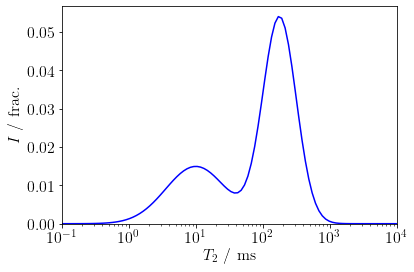

In [2]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

from distutils.spawn import find_executable
if find_executable('latex'): 
    print("latex installed")
    plt.rcParams.update({'text.usetex' : True}) 

plt.rcParams.update({'font.size': 16})


def gaussian(tau2, sigma, T2):
    p = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(tau2-T2)**2/(2*sigma**2))
    return p

def gaussian_mixture(N, T2min=1e-1, T2max=1e4):
    t2 = np.logspace(np.log10(T2min),
                     np.log10(T2max),
                     N,
                     endpoint=True,
                     base=10.0)
    
    x = np.linspace(T2min, T2max, N)
    g1 = gaussian(x, 500, 6500) # norm.pdf(x, 7000, 200)
    g2 = gaussian(x, 900, 4000) # norm.pdf(x, 7000, 200)
    g = g1 + 0.5 * g2
    gnorm = g / np.sum(g)
    return t2, gnorm

T2min=1e-1; T2max=1e4
t2, g = gaussian_mixture(100, T2min, T2max)
    
fig, ax = plt.subplots(1, 1)

ax.plot(t2, g, 'b-')
ax.set_xlabel(r'$T_2\,\,/\,\,\mathrm{ms}$')
ax.set_ylabel(r'$I\,\,/\,\,\mathrm{frac.}$')

ax.set_xlim(T2min, T2max)
ax.set_ylim(0,)

ax.set_xscale('log')

In [3]:
fig.savefig('img/gaussian_mixture.png', dpi=300, bbox_inches='tight')

(0, 1999.9)

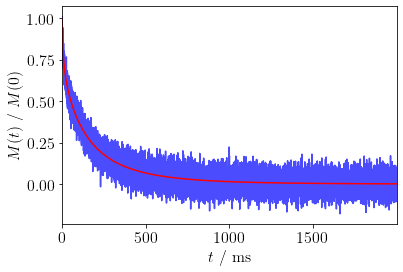

In [5]:
te = 0.1  # ms
t = np.arange(2e4) * te
m = np.sum(g * np.exp(- np.outer(t , 1 / t2)), axis=1)
mn = m + np.random.normal(loc=0, scale=0.05, size=len(m))


fig2, ax2 = plt.subplots(1, 1)
ax2.plot(t, mn, 'b-', alpha=0.7)
ax2.plot(t, m, 'r-')

ax2.set_xlabel(r'$t\,\,/\,\,\mathrm{ms}$')
ax2.set_ylabel(r'$M(t)\,\,/\,\,M(0)$')
ax2.set_xlim(0, t[-1])

In [6]:
fig2.savefig('img/time_domain_gaussian_mixture_sigma_0p05.png', dpi=300, bbox_inches='tight')